In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import magnification

library not found.
Run /lustre/work/sunao.sugiyama/fft-extended-source/magnification/Makefile


In [3]:
plt.rcParams['font.family'] = 'serif'# 'sans-serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

## How to use timeave module

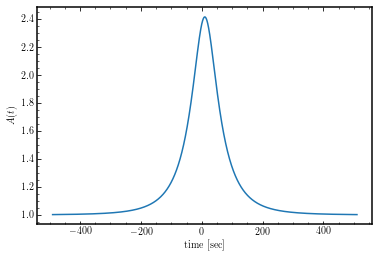

In [4]:
umin = 0.1
tE = 100
t0 = 10.
rho = 0.1

n = 5
t = np.linspace(t0-n*tE, t0+n*tE, 2048) # This grid size guarantees accuracy of 0.3%
u = (umin*2+(t-t0)**2/tE**2)**0.5

mag = magnification.mag_fft.magnification(profile_names=['disk'])
a = mag.A_disk(u.copy(), rho)

plt.figure()
plt.xlabel('time [sec]')
plt.ylabel(r'$A(t)$')
plt.plot(t, a)
plt.show()

CPU times: user 1.6 ms, sys: 209 µs, total: 1.81 ms
Wall time: 1.37 ms


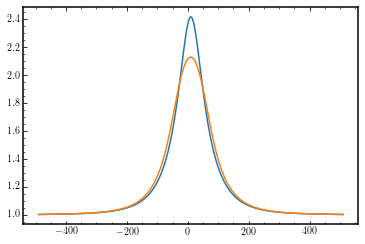

In [7]:
dt = 100.0
%time a_bar = magnification.timeave.timeave(t, a, dt, N_pad=100)

plt.figure()
plt.plot(t, a)
plt.plot(t, a_bar)
plt.show()

## Validation

In [6]:
from scipy.integrate import quad

In [7]:
def func(t):
    u = (umin*2+(t-t0)**2/tE**2)**0.5
    return mag.A_disk(u, rho)

%time a_bar_true = np.array([ quad(func, _t-dt/2, _t+dt/2)[0]/dt  for _t in t[::10] ])

CPU times: user 10.1 s, sys: 6.85 ms, total: 10.2 s
Wall time: 10.2 s


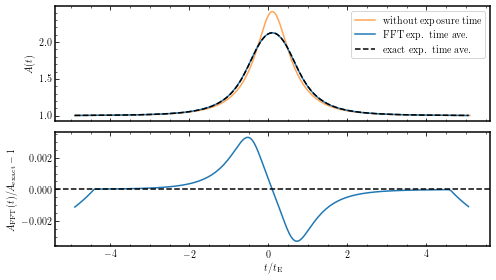

In [8]:
fig, axes = plt.subplots(2,1,sharex=True, figsize=(7, 4))
plt.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.set_ylabel(r'$A(t)$')
ax.plot(t/tE, a, color='C1', alpha=0.7, label='without exposure time')
ax.plot(t[::10]/tE, a_bar[::10], color='C0', label='FFT exp. time ave.')
ax.plot(t[::10]/tE, a_bar_true, color='k', ls='--', label='exact exp. time ave.')
ax.legend()
ax = axes[1]
ax.set_ylabel(r'$A_{\rm FFT}(t)/A_{\rm exact}-1$')
ax.set_xlabel(r'$t/t_\mathrm{E}$')
ax.plot(t[::10]/tE, a_bar[::10]/a_bar_true-1, color='C0')
ax.axhline(0.0, color='k', linestyle='--')
plt.tight_layout()
plt.show()